In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [3]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [4]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [5]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

### Ejercicio 1:
### Hacer un gráfico para niños y otro para niñas graficando todos los percentiles correspondientes para el peso en cada uno.

Percentiles para el peso de niños:
- Descripción del dataset en la página: https://www.cdc.gov/growthcharts/percentile_data_files.htm
  Weight-for-age charts, birth to 36 months, LMS parameters and selected smoothed weight percentiles 
  in kilograms, by sex and age.
- Los parámetros LMS son la mediana (M), el coeficiente de variación generalizado (S) y la potencia 
  en la transformación de Box-Cox (L)

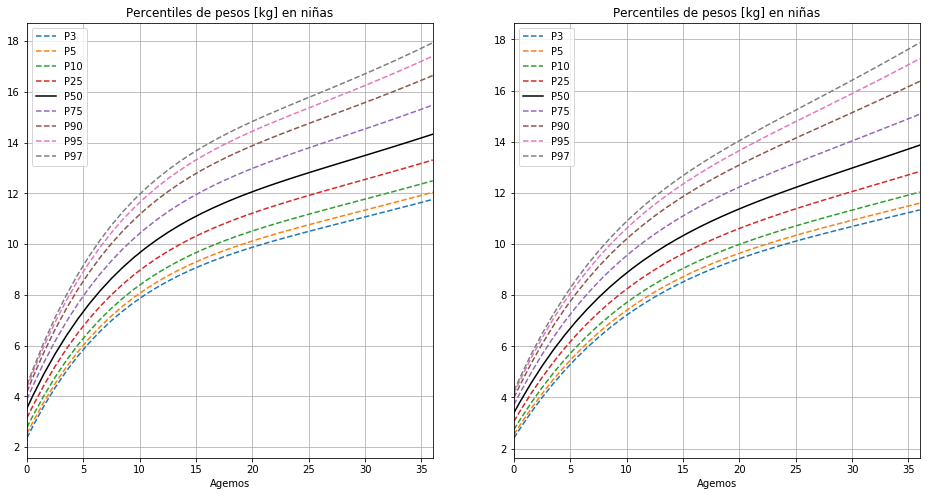

In [6]:
filtrado = tabla_1[tabla_1.Sex==1]
filtrado2 = tabla_1[tabla_1.Sex==2]
style=['--','--','--','--','k-','--','--','--','--','--']
fig, axes = plt.subplots(nrows=1, ncols=2)
filtrado.plot(x='Agemos',y=['P3','P5','P10','P25','P50','P75','P90','P95','P97'],style=style,
              title='Percentiles de pesos [kg] en niñas',ax=axes[0],figsize=(16,8),grid=True)
filtrado2.plot(x='Agemos',y=['P3','P5','P10','P25','P50','P75','P90','P95','P97'],style=style,
              title='Percentiles de pesos [kg] en niñas',ax=axes[1],figsize=(16,8),grid=True)

plt.show()

### Ejercicio 2: 
### Con los datos del archivo pasos.json hacer un gráfico de barras para cada provincia con la cantidad de pasos que tiene. 

In [7]:
#Cargamos el archivo
tabla_pasos = pd.read_json(BASE_DIR + "/input/pasos.json")
tabla_pasos.head(5)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz


In [8]:
#tabla_pasos = tabla_pasos[tabla_pasos.columns[::-1]] # Primera columna etiqueta de interes
#tabla_pasos.head(5)

In [9]:
# Describimos los pasos por sus nombres para buscar repeticiones:
tabla_pasos.name.describe()

count                    252
unique                   238
top       AERO MAR DEL PLATA
freq                       2
Name: name, dtype: object

#### Podemos ver que hay pasos repetidos. Siempre se repiten dentro de la misma provincia? Porque en caso de que no fuera así, cuál se eliminaría, o a qué provincia se le asignaría el paso?

In [10]:
k=[False]*252
#len(k)
for i in tabla_pasos[tabla_pasos.name.duplicated()].name:
    k=k|(tabla_pasos.name==i)
tabla_pasos[k]

,location,name,province
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...
22,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÃ‘EZ,Santa Cruz
23,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÃ‘EZ,Santa Cruz
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
54,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
63,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
66,"[-32.825277, -70.0729456]",CRISTO REDENTOR (LIBERTADORES),Mendoza


##### Se comprueba que salvo el caso en que está mál escrito el nombre de la provincia,siempre se repiten dentro de la misma provincia.

#### Ahora deberíamos ver si no hay más de un paso que tenga la misma posición pero que figure con más de un nombre:

In [11]:
coord = tabla_pasos['location'].apply(pd.Series)
coord = coord.rename(columns = lambda x : 'coord_' + str(x))
tabla_pasos = pd.concat([tabla_pasos[:], coord[:]], axis=1)
tabla_pasos[coord.duplicated()].count()

location    34
name        34
province    34
coord_0     34
coord_1     34
dtype: int64

#### Vemos que hay 34 repeticiones dadas por coordenadas (que pueden o no coincidir con algunas o todas de las repeticiones po nombre)

In [12]:
# Describimos los pasos por las provincias a las que pertenecen:
tabla_pasos.province.describe()

count              252
unique              25
top       Buenos Aires
freq                48
Name: province, dtype: object

#### En Argentina hay 23 provincias, por lo que el dataset tiene algún error.

In [13]:
list(tabla_pasos.province.unique())

['Tierra del Fuego',
 'Santa Cruz',
 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
 'Chubut',
 'Rio Negro',
 'Neuquen',
 'NEUQUEN',
 'Buenos Aires',
 'Mendoza',
 'San Luis',
 'San Juan',
 'Santa Fe',
 'CÃ³rdoba',
 'Cordoba',
 'Entre Rios',
 'La Rioja',
 'Corrientes',
 'Catamarca',
 'Santiago del Estero',
 'Tucuman',
 'Chaco',
 'Misiones',
 'Formosa',
 'Salta',
 'Jujuy']

#### Se puede ver los siguientes problemas en los datos:
- 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ' figura como una provincia 
- Neuquén aparece en mayúscula y minúscula, lo que se toma como dos provincias distintas 
- Córdoba con y sin aceto son tomadas como provincias distintas (y en el caso con acento importada erroneamente)
- No figura La Pampa (no sería a priori un error, pero sí algo a remarcar al usuario/dueño de los datos)

#### Limpieza de los datos:

In [14]:
# Se elimina 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ'
tabla_pasos_c = tabla_pasos[tabla_pasos.province != 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']
# Se corrijen los nonmbres:
tabla_pasos_c = tabla_pasos_c.replace({'NEUQUEN': 'Neuquen', 'CÃ³rdoba': 'Cordoba'})
tabla_pasos_c.province.describe()

count              251
unique              22
top       Buenos Aires
freq                48
Name: province, dtype: object

In [15]:
# Se eliminan los pasos duplicados por coordenadas:
tabla_sinrep = tabla_pasos_c[~tabla_pasos_c[['coord_0','coord_1']].duplicated()]

# Se eliminan los pasos repetidos por nombre:
tabla_sinrep = tabla_sinrep[~(tabla_sinrep['name'].duplicated())]

# Se verifica que coincidan el número de nombres y localizaciones únicas (sin repeticiones) por provincia:
tabla_sinrep.groupby('province')['name','location'].nunique()


,name,location
province,,
Buenos Aires,42,42
Catamarca,3,3
Chaco,3,3
Chubut,13,13
Cordoba,3,3
Corrientes,15,15
Entre Rios,12,12
Formosa,9,9
Jujuy,7,7


In [21]:
# Se crea la tabla a graficar:
n_pasos = tabla_sinrep.groupby('province')['name'].nunique()
n_pasos = n_pasos.to_frame()
n_pasos =n_pasos.reset_index()
n_pasos = n_pasos.rename(columns = {'province':'Provincias','name': 'Número de pasos'})
n_pasos.head(5)

,Provincias,Número de pasos
0,Buenos Aires,42
1,Catamarca,3
2,Chaco,3
3,Chubut,13
4,Cordoba,3


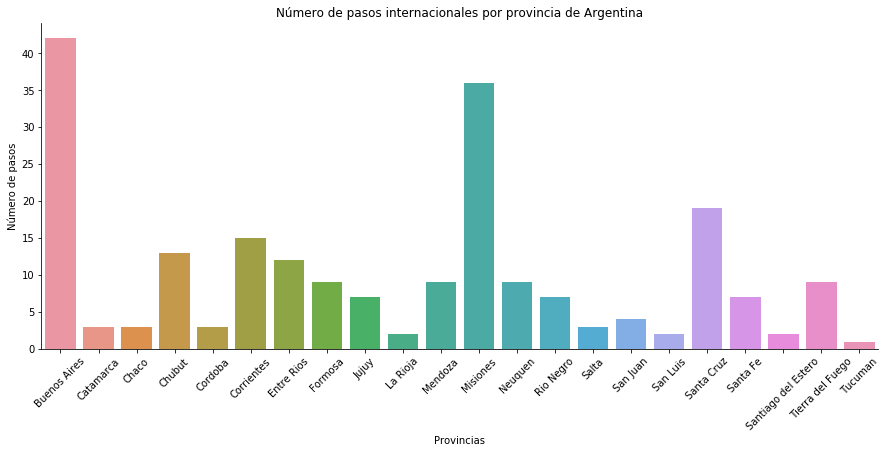

In [20]:
import seaborn as sns
# Se grafica:
plt.figure(figsize=(15,6))
plt.title('Número de pasos internacionales por provincia de Argentina')
sns.barplot(data=n_pasos,x='Provincias', y='Número de pasos')
sns.despine()
plt.xticks(rotation=45)
plt.show()